Quantum Tokyo    
May 16, 2024    
Teruaki Shikuma, Jiwon Ju

# Qiskit入門ハンズオン 量子ビット・ゲート・回路編 

In [1]:
from IPython.display import Image

# １量子ビット回路
まず1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

In [1]:
# Import the qiskit library

from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator

### 空の回路

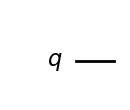

In [2]:
# １量子ビット回路を用意
qc = QuantumCircuit(1)

# 回路を描画
qc.draw(output="mpl")

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


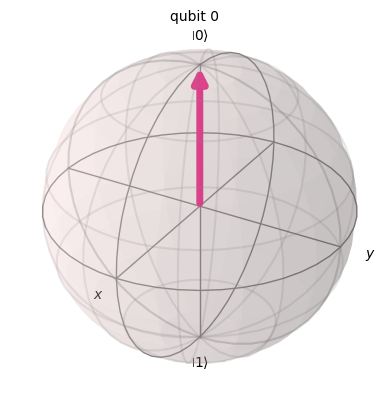

In [4]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

#### (補足説明)量子状態の表記とブロッホ球

<img src="attachment:105342bd-9617-4ce8-81e5-f61e0a49369a.png" width="600px">
<img src="attachment:1fdc5639-f147-4592-899a-672218218ade.png" width="600px">


### Xゲート

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 回路を描画
qc.draw(output="mpl")

IBM Quantumでは、初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


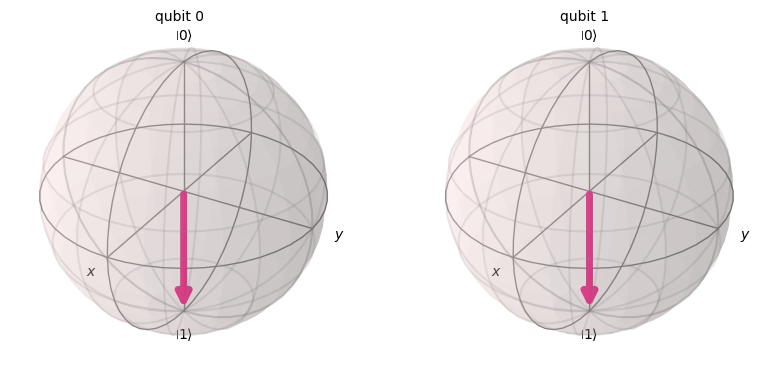

In [10]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は j )で表示されています。

#### (Xゲートの補足説明)
<img src="attachment:6b63eea6-e8cf-48b0-b033-5aacfc8c8ab0.png" width="600px">


### Hゲート

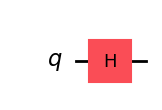

In [11]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


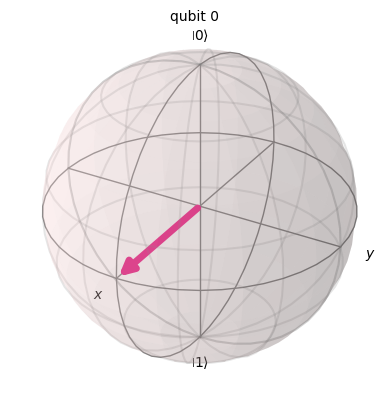

In [12]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。




つまり、$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。

#### (Hゲートの補足説明)
<img src="attachment:e077fe63-29ec-4e51-9d1d-c0f8e3f1969a.png" width="600px">


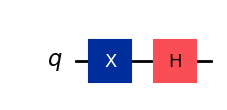

In [13]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


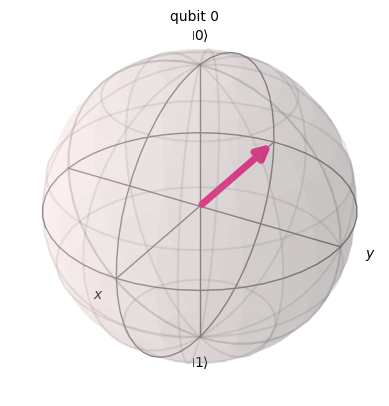

In [14]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。

#### (Hゲートの補足説明2)
<img src="attachment:3c07b944-fec3-40dd-bbd3-3588be6a3c62.png" width="600px">


## 演習1
次の量子回路をプログラミングし、状態ベクトルシミュレーターで実行して、ブロッホ球を表示してみましょう。

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $ZH|1\rangle$

ヒント：Zゲートは、

    qc.z(0)
    
とかきます。新しいセルを追加したい場合は、上側の「+」を選択するか、キーボードの「B」を押します。

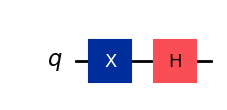

In [15]:
### (1) XX|0> ###

# １量子ビット回路を用意 
##コードを記入します##

# Xゲートを0番目の量子ビットに操作します。
##コードを記入します##

# もう一度、Xゲートを0番目の量子ビットに操作します。
##コードを記入します##

# 回路を描画
qc.draw(output="mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


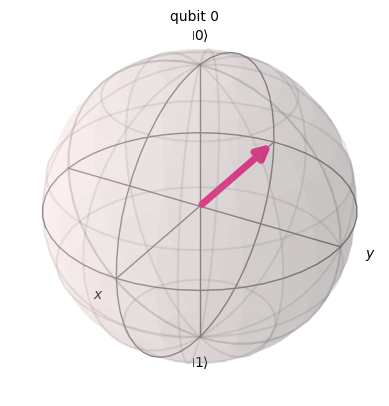

In [16]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
### (2) HH|0> ###
##コードを記入します##

qc.draw("mpl")

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


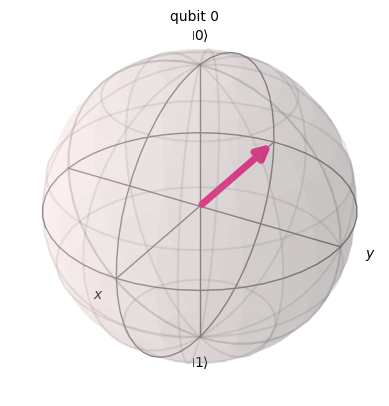

In [17]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
### (3) ZH|1> ###
##コードを記入します##

qc.draw("mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

# 2量子ビット回路

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Hゲートを1番目の量子ビットに操作します。
qc.h(1)

# 回路を描画
qc.draw(output="mpl")

In [18]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([ 0.707-0.j, -0.707+0.j],
            dims=(2,))


２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$


$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。

#### (複数量子ビットの表記の補足)

<img src="attachment:1a3e10c3-bde2-4289-8734-88e2aff7e533.png" width='600px'>


In [ ]:
# ブロッホ球の表示
plot_bloch_multivector(result)

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

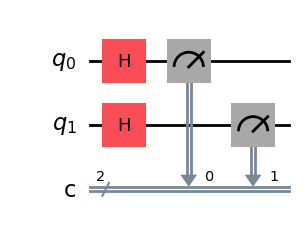

In [19]:
# ２量子ビットと2古典ビットの回路を作成します。
qc = QuantumCircuit(2,2)

# ゲートを適用します。
qc.h(0)
qc.h(1)

# 測定ゲートを追加
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

次にAerシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

/Users/yo-mac-note/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


 > Counts: {'00': 249, '11': 241, '10': 258, '01': 276}


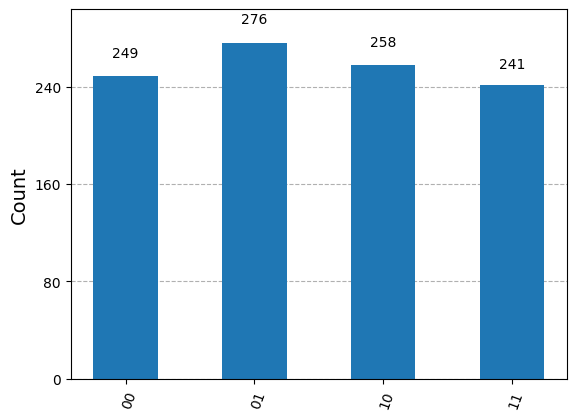

In [20]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

次は、$CNOT$ゲート（$CX$ゲート）の実験を行います。

$CNOT$ゲートは、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。
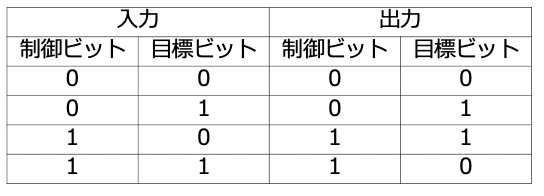

まず、q0とq1が両方とも0の場合を計算してみましょう。

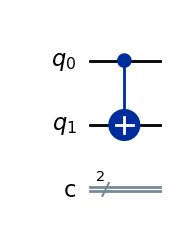

In [21]:
# ２量子ビット回路を作成します。 
qc = QuantumCircuit(2,2)

# q0, q1が0の場合
qc.cx(0,1)   # CNOTゲートの制御ビットをq0、目標ビットをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [22]:
## 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))



次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、多くの量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。


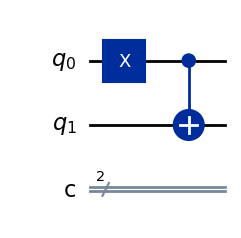

In [23]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0の場合
qc.x(0)    # q0を1にします。
qc.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [24]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

シミュレーターで計算してみましょう。

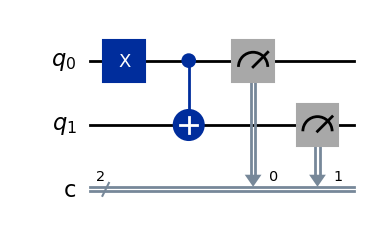

In [25]:
# 回路を測定
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

In [9]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

NameError: name 'generate_preset_pass_manager' is not defined

$|11\rangle$の状態が100%測定されます。




# 量子もつれと実デバイスでの測定
エンタングルメント状態を作り実デバイスで測定してみます。

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。
量子もつれ状態とは2つの量子ビットが、強い関連性で結ばれた状態を指します。
量子テレポーテーションなどで利用されます。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

これは、「片方の量子ビットが$|0\rangle$の場合に、もう片方の量子ビットも$|0\rangle$になっている」状態と、「片方の量子ビットが$|1\rangle$の場合に、もう片方の量子ビットも$|1\rangle$になっている」状態の重ね合わせ状態になっています。つまり、片方の量子ビットの状態が決まると、残りの量子ビットが確定するような状態となっています。別の言い方をすると、$|00\rangle$と$|11\rangle$という2つのデータが半々の確率で観測されることを示しています。<br>

上記の状態をつくるには、まず片方の量子ビットを重ね合わせの状態にします。つまり、
$$ |00\rangle \rightarrow  \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle  $$

その後、CXゲートを作用させます。量子ビット0をコントロールビット、量子ビット1をターゲットビットとします。すると、右側が1の量子ビットに対して、残った方の量子ビットを反転させます。
$$ CX(\frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|01\rangle) \rightarrow \frac{1}{\sqrt{2}}|00\rangle  + \frac{1}{\sqrt{2}}|11\rangle $$

では、演習1-2で実際にこの量子状態を作ってみましょう。<br>


#### (エンタングルメントの特性についてざっくり理解するための補足情報)

<img src="attachment:13a9c48e-caa1-4f43-8a33-053efaf3c63e.png" width="400px"><img src="attachment:19094af2-2f7d-49fc-8ccf-8786185d468e.png" width="400px">

## 演習2

(1) 次の回路をプログラミングし、Aerシミュレーターを実行して、結果をヒストグラムで表示してください。$|00\rangle$と$|11\rangle$がほぼ半分ずつになることを確認します。
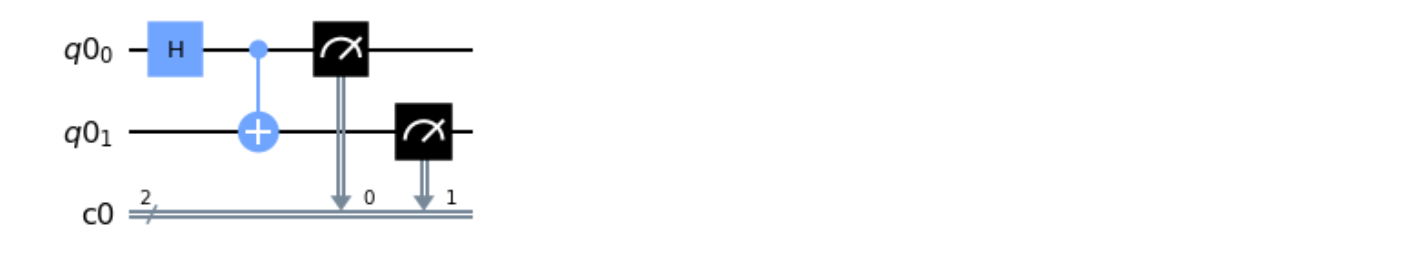

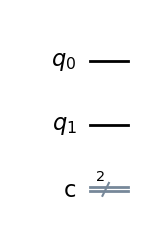

In [5]:
# 2量子ビット回路の用意
qc = QuantumCircuit(2,2) ##コードを記入します##

# 2量子ビットのエンタングルメント回路の作成
##コードを記入します##


# 回路を測定
##コードを記入します##


# 回路を描画
qc.draw(output="mpl")

In [6]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

NameError: name 'generate_preset_pass_manager' is not defined

(2) 以下のコードを実行して実デバイスで計算してみましょう。

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# local環境で初めて実行する場合は、認証情報をディスクに保存します：
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='<IBM Quantum API key>')

service = QiskitRuntimeService()

In [ ]:
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.get_backend('ibm_kyoto')

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
print("最も空いているバックエンドは: ", backend)

In [ ]:
# 回路を実機で実行可能なbasisゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
sampler = Sampler(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # job idの確認

In [ ]:
# ジョブの実行状態を確認します
job.status()

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
job = service.job('crwagasx484g008fca5g') # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status()

In [ ]:
# ジョブの実行状態を確認します
job.status()

In [ ]:
### job has successfully runになってから実行します ###
result = job.result()
print(f" > Counts: {result[0].data.c.get_counts()}")

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())

# GHZ状態

3量子ビット以上が完全にエンタングルした状態をGHZ状態 (Greenberger–Horne–Zeilinger state) と呼びます。

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

３量子ビットのGHZ状態は、次のような量子回路で作成することができます。

In [ ]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure_all()

qc.draw("mpl")

量子回路の「深さ」は、量子回路を評価する指標としてよく使われます。こちらのリンク先が、量子回路の「深さ」を理解するのに役立ちます：
https://docs.quantum.ibm.com/_next/image?url=%2Fimages%2Fapi%2Fqiskit%2Fdepth.gif&w=1920&q=75

QuantumCircuit.depth()で、量子回路の深さを調べることができ、上の回路の深さは4です。


#### （リンク先のgifが速いので、静止画による説明）

下図のような量子回路を元に説明します。

下図では、14回の操作があるように見えますが、量子回路では、**複数量子ビット** に対して **同時に** ゲート操作をすることは可能です。この時実行する単位を **layer** と呼びます。

<img src="attachment:1fa8ae72-093e-43dc-8ed4-7206b493c822.png" width="400px">

具体的な例として、複数の操作が1つのlayerにまとまる、layer #2を見てみます。

cxゲートが量子ビット(0,5), (1,6), (2,7), (3,8), (4,9)間に適用されていますが、対象の量子ビットは重複していないため同時に実行でき、layerは1つだけになります。

<img src="attachment:9f15b791-6888-4b1b-954d-7bd9fc0fb9ca.png" width="400px">

次にlayer #3を見てみます。

cxゲートが量子ビット(1,7)間に適用、xゲートが量子ビット(8)に適応されています。量子ビット(1,7,8)はlayer #2で量子ゲートの操作を行っている量子ビットなので、ここはlayerが分離します。

<img src="attachment:460c8cb4-41b2-411a-b03f-05927c9ff6e2.png" width="400px">

同様にして最後まで見ていくと、赤で囲んだ部分が原因で下図のようにlayerが分かれます。このlayerの個数が、 **深さ(depth)** と定義されているものです。

<img src="attachment:4eedfc1a-3250-419c-98e6-795df94eb10e.png" width="400px">

In [ ]:
qc.depth()

## 演習 3

$8$ 量子ビットのGHZ状態は、以下のようになります。

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle)$$

この状態を最も浅い回路で作ってみましょう。最も浅い量子回路の depth は、測定ゲートを合わせて 5 です！

In [ ]:
qc = QuantumCircuit(8,8)

# ここから下にコードを書きます



# ここから上にコードを書きます

# 測定
qc.measure_all()

qc.draw("mpl")
#print(qc.depth())

In [ ]:
print(qc.depth())

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.meas.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

In [ ]:
# Qiskitバージョンの確認
import qiskit
qiskit.__version__